# DECISIONTREEREGRESSOR

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Bitcoin.csv')
data.head()

SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09

In [3]:
data.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [4]:
del data['SNo']
del data['Name']
del data['Symbol']
del data['Date']
del data['Marketcap']

In [5]:
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume'], dtype='object')

In [6]:
data.isnull().sum()

High      0
Low       0
Open      0
Close     0
Volume    0
dtype: int64

In [7]:
df=data.dropna()
df.head()

High         Low        Open       Close  Volume
0  147.488007  134.000000  134.444000  144.539993     0.0
1  146.929993  134.050003  144.000000  139.000000     0.0
2  139.889999  107.720001  139.000000  116.989998     0.0
3  125.599998   92.281898  116.379997  105.209999     0.0
4  108.127998   79.099998  106.250000   97.750000     0.0

In [8]:
x=df.drop(labels='Close',axis=1)
y=df.loc[:,'Close']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print("NUMBER OF TRAIN DATASET:",len(x_train))
print("NUMBER OF TEST DATASET :",len(x_test))
print("TOTAL NUMBER OF DATASET:",len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET: 2392
NUMBER OF TEST DATASET : 599
TOTAL NUMBER OF DATASET: 2991


In [10]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  2392
NUMBER OF TEST DATASET      :  599
TOTAL NUMBER OF DATASET    :  2991


In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [13]:
predicted=DTR.predict(x_test)

In [14]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,predicted)
print("THE R2 SCORE OF DECISIONTREEREGRESSOR IS :",R2)

THE R2 SCORE OF DECISIONTREEREGRESSOR IS : 0.9989643458882929


In [15]:
from sklearn.metrics import rand_score
RAND = rand_score(y_test,predicted)
print("THE ACCURACY SCORE OF DECISIONTREEREGRESSOR IS :",RAND*100)

THE ACCURACY SCORE OF DECISIONTREEREGRESSOR IS : 99.94137386167581


In [16]:
from sklearn.metrics import explained_variance_score
EVS = explained_variance_score(y_test,predicted)
print("THE EXPLAINED VARIENCE SCORE OF  DECISIONTREEREGRESSOR IS :",EVS)

THE EXPLAINED VARIENCE SCORE OF  DECISIONTREEREGRESSOR IS : 0.9989661727407572


In [17]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,predicted)
print("THE MEAN SQUARED ERROR SCORE OF DECISIONTREEREGRESSOR IS :",MSE)

THE MEAN SQUARED ERROR SCORE OF DECISIONTREEREGRESSOR IS : 101519.72999604093


In [18]:
from sklearn.metrics import median_absolute_error
MAE = median_absolute_error(y_test,predicted)
print("THE MEAN ABSOLUTE ERROR SCORE OF DECISIONTREEREGRESSOR IS :",MAE)

THE MEAN ABSOLUTE ERROR SCORE OF DECISIONTREEREGRESSOR IS : 17.249558117499873


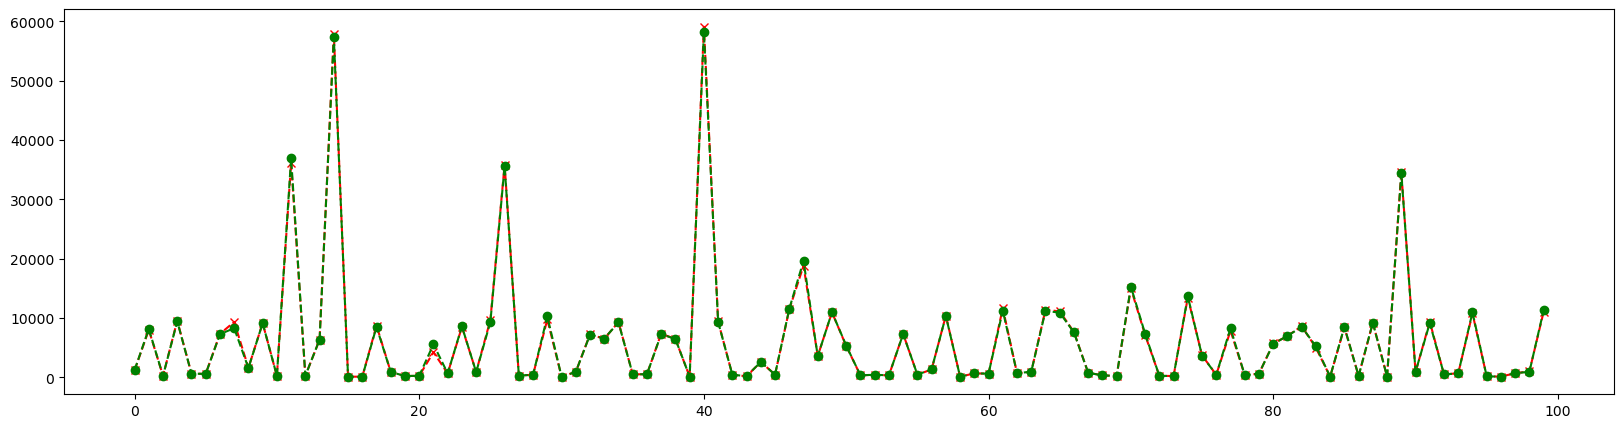

In [19]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [20]:
import joblib
joblib.dump(DTR,'BITCOIN2.pkl')

['BITCOIN2.pkl']

In [21]:
# #import ydata_profiling as yp
# import pandas_profiling
# from pandas_profiling import ProfileReport
# from ydata_profiling.model import describe
# prof = ProfileReport(data)
# prof.to_file(output_file='bitcoin.html')